# Hackerearth ML Project: Pet Adoption

> URL: https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-pet-adoption/machine-learning/pet-adoption-9-5838c75b/

---

## Step 1: Import libraries and read data

In [794]:
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_recall_fscore_support, plot_confusion_matrix
import xgboost as xgb

import hyperopt

In [659]:
def read_data(fpath):
    """
    Read the train and test datasets and return the pandas dataframes
    """
    tr_df = pd.read_csv(f"{fpath}/train.csv", index_col="pet_id")
    te_df = pd.read_csv(f"{fpath}/test.csv", index_col="pet_id")
    return tr_df, te_df
fpath = "C:/Users/shaun/Documents/my_projects/Data-Science-and-Machine-Learning/Hackerearth Project - Pet Adoption/Dataset"

tr_df, te_df = read_data(fpath)

In [660]:
tr_df.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
pet_id,,,,,,,,,,
ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [661]:
te_df.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
pet_id,,,,,,,,
ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


## Step 2: Exploratory Data Analysis

In [662]:
tr_df.describe(include='all')

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
count,18834,18834,17357.000000,18834,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
unique,3907,17209,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-03-20 00:00:00,2017-07-28 00:00:00,NaN,Black,NaN,NaN,NaN,NaN,NaN,NaN
freq,41,17,NaN,4620,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.883390,NaN,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,NaN,NaN,0.770434,NaN,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,NaN,NaN,0.000000,NaN,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,NaN,NaN,1.000000,NaN,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,NaN,NaN,1.000000,NaN,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000


In [663]:
te_df.describe(include='all')

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
count,8072,8072,7453.000000,8072,8072.000000,8072.000000,8072.000000,8072.000000
unique,2823,7719,NaN,54,NaN,NaN,NaN,NaN
top,2016-11-21 00:00:00,2019-05-04 00:00:00,NaN,Black,NaN,NaN,NaN,NaN
freq,22,6,NaN,1955,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.886623,NaN,0.507265,27.451163,5.254336,4.505327
std,NaN,NaN,0.770950,NaN,0.289615,12.917903,6.505841,3.523568
min,NaN,NaN,0.000000,NaN,0.000000,5.010000,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,0.260000,16.277500,0.000000,1.000000
50%,NaN,NaN,1.000000,NaN,0.510000,27.410000,0.000000,4.000000
75%,NaN,NaN,1.000000,NaN,0.760000,38.480000,13.000000,9.000000


Col "condition" has missing values in both train and test data

In [664]:
def find_missing_values():
    """
    Check for missing values in each col and return % of missing values (if any)
    """
    tr_data, te_data = pd.DataFrame(tr_df.isnull().sum()*100/len(tr_df), columns=['% missing values']) , pd.DataFrame(te_df.isnull().sum()*100/len(te_df), columns=['% missing values'])
    return tr_data, te_data

tr_missing_data, te_missing_data = find_missing_values()

In [665]:
tr_missing_data

,% missing values
issue_date,0.0000
listing_date,0.0000
condition,7.8422
color_type,0.0000
length(m),0.0000
height(cm),0.0000
X1,0.0000
X2,0.0000
breed_category,0.0000
pet_category,0.0000


In [666]:
te_missing_data

,% missing values
issue_date,0.000000
listing_date,0.000000
condition,7.668484
color_type,0.000000
length(m),0.000000
height(cm),0.000000
X1,0.000000
X2,0.000000


In [667]:
def statistical_analysis(cols):
    """
    Basic statistical analysis like:
    1. For cont vars display mean, median, quantiles, missing values
    2. For cont var display corr and plots with each other
    3. For cat vars we display freq of each cat
    4. For cat vars display dist of target wrt each cat value
    """

In [668]:
tr_df['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

### Breed category - unique categories

<img src="./diagrams/diag1.png" height="1000" width="1300">

### Features - how do they influence the distribution of breed category

1. wrt X1:

<img src="./diagrams/diag2.png" height="600" width="1000">

2. wrt X2:

<img src="./diagrams/diag3.png" height="600" width="1000">

3. Since X1 and X2 affect breed v=cat in similar manner is there corr bw them?

- does not seem so

<img src="./diagrams/diag10.png" height="600" width="1000">


3. How does length affect breed? Not much

<img src="./diagrams/diag4.png" height="600" width="1000">

4. How does height affect breed? Slightly lower for breed=0

<img src="./diagrams/diag5.png" height="600" width="1000">

5. How does condition affect breed? - when NULL its always breed = 2
    - simply replace with -1 and create feature with condition_NULL

<img src="./diagrams/diag6.png" height="600" width="600">


In [669]:
tr_df['height(cm)']

pet_id
ANSL_69903     7.78
ANSL_66892    14.19
ANSL_69750    40.90
ANSL_71623    17.82
ANSL_57969    11.06
              ...  
ANSL_51738    27.36
ANSL_59900    14.25
ANSL_53210    28.13
ANSL_63468    44.82
ANSL_73558    37.40
Name: height(cm), Length: 18834, dtype: float64

In [670]:
def compute_corr(col1, col2):
    """
    Returns person corr bw col1 and col2
    """
    print ("Train data:", np.corrcoef(x=np.array(tr_df[col1]), y=np.array(tr_df[col2]))[0][1])
    print ("Test data:", np.corrcoef(x=np.array(te_df[col1]), y=np.array(te_df[col2]))[0][1])
    return

print (compute_corr('X1', 'X2'))

print (compute_corr('length(m)', 'height(cm)'))

Train data: 0.5843958932820943
Test data: 0.5918704878368073
None
Train data: -0.004463705709559081
Test data: 0.010284175561638404
None


In [671]:
tr_df['height(m)'] = tr_df['height(cm)']/10
te_df['height(m)'] = te_df['height(cm)']/10

print (tr_df['height(m)'].describe())

print (compute_corr('length(m)', 'height(m)'))

count    18834.000000
mean         2.744883
std          1.301978
min          0.500000
25%          1.617250
50%          2.734000
75%          3.889000
max          5.000000
Name: height(m), dtype: float64
Train data: -0.0044637057095590835
Test data: 0.0102841755616384
None


### Any relationship bw breed and pet categories?

<img src="./diagrams/diag7.png" height="600" width="1000">

- if there had been a one-to-one relationship, then the model we build for one would have been suitable for the other, but it is not so

- so we should build separate models for each

### Issue Date features exploration wrt breed type

1. Year-wise

<img src="./diagrams/diag8.png" height="600" width="1000">

2. Month-wise

- there seems to be some seasonality - maybe encode months further as seasons

<img src="./diagrams/diag9.png" height="600" width="1000">

3. Day-wise: Weekday weekend patterns?

<img src="./diagrams/diag11.png" height="600" width="1000">

- On weekends breed = 1 sales exceed that of breed = 0, so might be helpful to have a feature for this


## Step 3: Feature engineering and Data cleaning for breed type

### Datetime manipulations

In [672]:
tr_df['issue_date']

pet_id
ANSL_69903    2016-07-10 00:00:00
ANSL_66892    2013-11-21 00:00:00
ANSL_69750    2014-09-28 00:00:00
ANSL_71623    2016-12-31 00:00:00
ANSL_57969    2017-09-28 00:00:00
                     ...         
ANSL_51738    2017-01-26 00:00:00
ANSL_59900    2016-06-18 00:00:00
ANSL_53210    2010-07-21 00:00:00
ANSL_63468    2017-05-12 00:00:00
ANSL_73558    2011-12-13 00:00:00
Name: issue_date, Length: 18834, dtype: object

In [673]:
tr_df['listing_date']

pet_id
ANSL_69903    2016-09-21 16:25:00
ANSL_66892    2018-12-27 17:47:00
ANSL_69750    2016-10-19 08:24:00
ANSL_71623    2019-01-25 18:30:00
ANSL_57969    2017-11-19 09:38:00
                     ...         
ANSL_51738    2018-03-09 15:35:00
ANSL_59900    2017-07-09 08:37:00
ANSL_53210    2018-08-22 14:27:00
ANSL_63468    2018-02-08 14:05:00
ANSL_73558    2018-10-26 14:18:00
Name: listing_date, Length: 18834, dtype: object

Both listing_date and issue_date are cols of type: "object". Lets change that

In [674]:
tr_df['issue_date'] = pd.to_datetime(tr_df['issue_date'])
tr_df['listing_date'] = pd.to_datetime(tr_df['listing_date'])

te_df['issue_date'] = pd.to_datetime(te_df['issue_date'])
te_df['listing_date'] = pd.to_datetime(te_df['listing_date'])

In [675]:
tr_df.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,height(m)
pet_id,,,,,,,,,,,
ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,0.778
ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1.419
ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,4.090
ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,1.782
ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,1.106


In [676]:
te_df.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,height(m)
pet_id,,,,,,,,,
ANSL_75005,2005-08-17,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,4.273
ANSL_76663,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,0.671
ANSL_58259,2012-10-11,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,4.121
ANSL_67171,2015-02-13,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,0.846
ANSL_72871,2017-01-18,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,3.092


Check the converted dtypes:

In [677]:
tr_df.dtypes

issue_date        datetime64[ns]
listing_date      datetime64[ns]
condition                float64
color_type                object
length(m)                float64
height(cm)               float64
X1                         int64
X2                         int64
breed_category           float64
pet_category               int64
height(m)                float64
dtype: object

In [678]:
te_df.dtypes

issue_date      datetime64[ns]
listing_date    datetime64[ns]
condition              float64
color_type              object
length(m)              float64
height(cm)             float64
X1                       int64
X2                       int64
height(m)              float64
dtype: object

### Feature: days_bw_list_issue: listing_date - issue_date

In [679]:
days_diff_tr = [day_.days for day_ in tr_df['listing_date']-tr_df['issue_date']]
tr_df['days_bw_list_issue'] = days_diff_tr

days_diff_te = [day_.days for day_ in te_df['listing_date']-te_df['issue_date']]
te_df['days_bw_list_issue'] = days_diff_te

In [680]:
tr_df.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,height(m),days_bw_list_issue
pet_id,,,,,,,,,,,,
ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,0.778,73
ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1.419,1862
ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,4.090,752
ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,1.782,755
ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,1.106,52


In [681]:
te_df.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,height(m),days_bw_list_issue
pet_id,,,,,,,,,,
ANSL_75005,2005-08-17,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,4.273,4404
ANSL_76663,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,0.671,174
ANSL_58259,2012-10-11,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,4.121,1999
ANSL_67171,2015-02-13,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,0.846,1148
ANSL_72871,2017-01-18,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,3.092,463


Are there any diff in days which are -ve

In [682]:
tr_df['days_bw_list_issue'].describe()

count    18834.000000
mean       855.306786
std       1096.674990
min        -76.000000
25%        119.000000
50%        392.000000
75%       1117.000000
max       8056.000000
Name: days_bw_list_issue, dtype: float64

In [683]:
tr_df.loc[tr_df['days_bw_list_issue'] < 0]

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,height(m),days_bw_list_issue
pet_id,,,,,,,,,,,,
ANSL_52243,2018-01-17,2018-01-14 15:13:00,2.0,Orange Tabby,0.72,43.19,13,9,0.0,1,4.319,-3
ANSL_63737,2016-11-18,2016-09-03 17:01:00,0.0,Black,0.88,27.82,0,1,1.0,1,2.782,-76


In [684]:
te_df.loc[te_df['days_bw_list_issue'] < 0]

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,height(m),days_bw_list_issue
pet_id,,,,,,,,,,


Lets delete these 2 observations from training

In [685]:
print (tr_df.shape)

tr_df = tr_df.loc[tr_df['days_bw_list_issue'] > 0]

print ("After deletion:", tr_df.shape)

(18834, 12)
After deletion: (18832, 12)


In [686]:
print (te_df.shape)

te_df = te_df.loc[te_df['days_bw_list_issue'] > 0]

print (te_df.shape)

(8072, 10)
(8072, 10)


In [687]:
te_df['days_bw_list_issue'].describe()

count    8072.000000
mean      856.057607
std      1103.689752
min        20.000000
25%       122.000000
50%       393.000000
75%      1116.000000
max      9154.000000
Name: days_bw_list_issue, dtype: float64

In the test data there are no -ves

In [688]:
tr_df['days_bw_list_issue'].max()

8056

days_bw_list_issue == 0?

In [689]:
tr_df.loc[tr_df['days_bw_list_issue']==0]

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,height(m),days_bw_list_issue
pet_id,,,,,,,,,,,,


In [690]:
te_df.loc[te_df['days_bw_list_issue']==0]

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,height(m),days_bw_list_issue
pet_id,,,,,,,,,,


### Feature 2: days_bw_list_issue_log2 = log2(days_bw_list_issue)

In [691]:
tr_df['days_bw_list_issue_log2'] = np.log2(tr_df['days_bw_list_issue'])

tr_df.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,height(m),days_bw_list_issue,days_bw_list_issue_log2
pet_id,,,,,,,,,,,,,
ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,0.778,73,6.189825
ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1.419,1862,10.862637
ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,4.090,752,9.554589
ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,1.782,755,9.560333
ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,1.106,52,5.700440


In [692]:
tr_df['days_bw_list_issue_log2'].describe()

count    18832.000000
mean         8.643302
std          1.884812
min          4.247928
25%          6.894818
50%          8.614710
75%         10.125413
max         12.975848
Name: days_bw_list_issue_log2, dtype: float64

In [693]:
tr_df.to_csv('tr_df.csv')

<img src="./diagrams/diag12.png" height="600" width="1000">


- As we can see, using the log transform we can discern quite a bit of info on the sale of breed types based on diff in issue and listing dates

In [694]:
te_df['days_bw_list_issue_log2'] = np.log2(te_df['days_bw_list_issue'])

te_df.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,height(m),days_bw_list_issue,days_bw_list_issue_log2
pet_id,,,,,,,,,,,
ANSL_75005,2005-08-17,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,4.273,4404,12.104599
ANSL_76663,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,0.671,174,7.442943
ANSL_58259,2012-10-11,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,4.121,1999,10.965063
ANSL_67171,2015-02-13,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,0.846,1148,10.164907
ANSL_72871,2017-01-18,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,3.092,463,8.854868


In [695]:
te_df['days_bw_list_issue_log2'].describe()

count    8072.000000
mean        8.647809
std         1.878908
min         4.321928
25%         6.930737
50%         8.618386
75%        10.124121
max        13.160187
Name: days_bw_list_issue_log2, dtype: float64

### Features 3-8: month, year, is_weekday, is_summer, is_spring, is_winter

In [696]:
tr_df['listing_date'][0].hour

16

In [697]:
def build_date_features():
    """
    Build month, year, weekday (0-6: Mon-Sun), season features
    Jan-April, May-Sep, Oct-Dec 
    """

    ### year as a feature
    year_tr = [date_.year for date_ in tr_df['issue_date']]
    year_te = [date_.year for date_ in te_df['issue_date']]

    ### month as a feature
    month_tr = [date_.month for date_ in tr_df['issue_date']]
    month_te = [date_.month for date_ in te_df['issue_date']]

    ### weekday or not as a feature
    day_of_week_tr = [date_.weekday() for date_ in tr_df['issue_date']]
    day_of_week_te = [date_.weekday() for date_ in te_df['issue_date']]

    is_weekday_tr = [1 if day_ >= 5 else 0 for day_ in day_of_week_tr]
    is_weekday_te = [1 if day_ >= 5 else 0 for day_ in day_of_week_te]

    ### seasonal features
    is_spring_tr = [1 if month_ >=1 and month_ <= 4 else 0 for month_ in month_tr]
    is_spring_te = [1 if month_ >=1 and month_ <= 4 else 0 for month_ in month_te]

    is_summer_tr = [1 if month_ >=5 and month_ <= 9 else 0 for month_ in month_tr]
    is_summer_te = [1 if month_ >=5 and month_ <= 9 else 0 for month_ in month_te]

    is_winter_tr = [1 if month_ >=10 and month_ <= 12 else 0 for month_ in month_tr]
    is_winter_te = [1 if month_ >=10 and month_ <= 12 else 0 for month_ in month_te]
    
    tr_df['year'] = year_tr
    te_df['year'] = year_te
    
    tr_df['month'] = month_tr
    te_df['month'] = month_te
    
    tr_df['is_weekday'] = is_weekday_tr
    te_df['is_weekday'] = is_weekday_te
    
    tr_df['is_spring'] = is_spring_tr
    te_df['is_spring'] = is_spring_te
    
    tr_df['is_summer'] = is_summer_tr
    te_df['is_summer'] = is_summer_te
    
    tr_df['is_winter'] = is_winter_tr
    te_df['is_winter'] = is_winter_te
    
    ### =======================  repeat for listing_date
    ### year as a feature
    year_tr = [date_.year for date_ in tr_df['listing_date']]
    year_te = [date_.year for date_ in te_df['listing_date']]

    ### month as a feature
    month_tr = [date_.month for date_ in tr_df['listing_date']]
    month_te = [date_.month for date_ in te_df['listing_date']]
    
    ### hour as a feature
    hour_tr = [date_.hour for date_ in tr_df['listing_date']]
    hour_te = [date_.hour for date_ in te_df['listing_date']]
    
    ### weekday or not as a feature
    day_of_week_tr = [date_.weekday() for date_ in tr_df['listing_date']]
    day_of_week_te = [date_.weekday() for date_ in te_df['listing_date']]

    is_weekday_tr = [1 if day_ >= 5 else 0 for day_ in day_of_week_tr]
    is_weekday_te = [1 if day_ >= 5 else 0 for day_ in day_of_week_te]

    ### seasonal features
    is_spring_tr = [1 if month_ >=1 and month_ <= 4 else 0 for month_ in month_tr]
    is_spring_te = [1 if month_ >=1 and month_ <= 4 else 0 for month_ in month_te]

    is_summer_tr = [1 if month_ >=5 and month_ <= 9 else 0 for month_ in month_tr]
    is_summer_te = [1 if month_ >=5 and month_ <= 9 else 0 for month_ in month_te]

    is_winter_tr = [1 if month_ >=10 and month_ <= 12 else 0 for month_ in month_tr]
    is_winter_te = [1 if month_ >=10 and month_ <= 12 else 0 for month_ in month_te]

    # print (np.max(is_weekday_tr), np.min(is_weekday_tr), np.max(is_spring_tr), np.min(is_spring_tr), np.max(is_summer_tr), np.min(is_summer_tr), np.max(is_winter_tr), np.min(is_winter_tr))

    # print (np.max(is_weekday_te), np.min(is_weekday_te), np.max(is_spring_te), np.min(is_spring_te), np.max(is_summer_te), np.min(is_summer_te), np.max(is_winter_te), np.min(is_winter_te))
    tr_df['listing_year'] = year_tr
    te_df['listing_year'] = year_te
    
    tr_df['listing_month'] = month_tr
    te_df['listing_month'] = month_te
    
    tr_df['listing_hour'] = hour_tr
    te_df['listing_hour'] = hour_te
    
    tr_df['listing_is_weekday'] = is_weekday_tr
    te_df['listing_is_weekday'] = is_weekday_te
    
    tr_df['listing_is_spring'] = is_spring_tr
    te_df['listing_is_spring'] = is_spring_te
    
    tr_df['listing_is_summer'] = is_summer_tr
    te_df['listing_is_summer'] = is_summer_te
    
    tr_df['listing_is_winter'] = is_winter_tr
    te_df['listing_is_winter'] = is_winter_te
    
    
    print (tr_df.describe())
    
    print (te_df.describe())
    
    return tr_df, te_df

tr_df, te_df = build_date_features()

          condition     length(m)    height(cm)            X1            X2  \
count  17355.000000  18832.000000  18832.000000  18832.000000  18832.000000   
mean       0.883377      0.502604     27.447977      5.369477      4.577262   
std        0.770403      0.288703     13.019967      6.572364      3.517706   
min        0.000000      0.000000      5.000000      0.000000      0.000000   
25%        0.000000      0.250000     16.170000      0.000000      1.000000   
50%        1.000000      0.500000     27.335000      0.000000      4.000000   
75%        1.000000      0.760000     38.890000     13.000000      9.000000   
max        2.000000      1.000000     50.000000     19.000000      9.000000   

       breed_category  pet_category     height(m)  days_bw_list_issue  \
count    18832.000000  18832.000000  18832.000000        18832.000000   
mean         0.600573      1.709218      2.744798          855.401816   
std          0.629894      0.717920      1.301997         1096.694388

### Feature 9: Exploring color types

In [698]:
print (list(tr_df['color_type'].unique()))

['Brown Tabby', 'White', 'Brown', 'Black', 'Red', 'Tricolor', 'Calico', 'Brown Brindle', 'Blue', 'Tortie', 'Gray', 'Fawn', 'Buff', 'Torbie', 'Orange Tabby', 'Sable', 'Tan', 'Blue Tick', 'Orange', 'Blue Tabby', 'Chocolate', 'Black Tabby', 'Black Brindle', 'Cream Tabby', 'Gold', 'Calico Point', 'Blue Merle', 'Red Merle', 'Yellow', 'Lynx Point', 'Blue Cream', 'Flame Point', 'Cream', 'Yellow Brindle', 'Blue Tiger', 'Seal Point', 'Red Tick', 'Brown Merle', 'Black Smoke', 'Gray Tabby', 'Green', 'Tortie Point', 'Blue Smoke', 'Apricot', 'Blue Point', 'Silver Tabby', 'Lilac Point', 'Silver', 'Brown Tiger', 'Liver', 'Agouti', 'Chocolate Point', 'Liver Tick', 'Pink', 'Black Tiger', 'Silver Lynx Point']


Basic preprocessing - lowercase and whitespace trimming

In [699]:
colors_tr = [color_.lower().strip() for color_ in tr_df['color_type']]
colors_te = [color_.lower().strip() for color_ in te_df['color_type']]

tr_df['color_type'] = colors_tr
te_df['color_type'] = colors_te

In [700]:
color_not_in_tr, color_not_in_te = [c for c in colors_te if c not in colors_tr], [c for c in colors_tr if c not in colors_te]

print (color_not_in_tr)

print (color_not_in_te)

[]
['brown tiger', 'brown tiger', 'black tiger', 'brown tiger', 'brown tiger']


Ok, good, so all colors in test are in training

In [701]:
colors_data_html = pd.read_html(io="https://flaviocopes.com/rgb-color-codes/")[0]

colors_data_html

,Color,Name,#RRGGBB (Hex Code),"R,G,B (Decimal code)"
0,NaN,maroon,#800000,"(128,0,0)"
1,NaN,dark red,#8B0000,"(139,0,0)"
2,NaN,brown,#A52A2A,"(165,42,42)"
3,NaN,firebrick,#B22222,"(178,34,34)"
4,NaN,crimson,#DC143C,"(220,20,60)"
...,...,...,...,...
134,NaN,silver,#C0C0C0,"(192,192,192)"
135,NaN,light gray / light grey,#D3D3D3,"(211,211,211)"
136,NaN,gainsboro,#DCDCDC,"(220,220,220)"
137,NaN,white smoke,#F5F5F5,"(245,245,245)"


In [702]:
### fix gray color
colors_data_html.loc[colors_data_html['Name'] == 'gray / grey', 'Name'] = 'gray'

In [703]:
### add fawn (229, 170, 112)
### add buff (224, 171, 118)
### add cream ((255, 253, 208))
### add apricot  (251, 206, 177)
### add liver (103, 76, 71)

fawn_row = pd.DataFrame([[np.nan, 'fawn', np.nan, (229, 170, 112)]], columns=colors_data_html.columns)
buff_row = pd.DataFrame([[np.nan, 'buff', np.nan, (224, 171, 118)]], columns=colors_data_html.columns)
cream_row = pd.DataFrame([[np.nan, 'cream', np.nan, (255, 253, 208)]], columns=colors_data_html.columns)
apricot_row = pd.DataFrame([[np.nan, 'apricot', np.nan, (251, 206, 177)]], columns=colors_data_html.columns)
liver_row = pd.DataFrame([[np.nan, 'liver', np.nan, (103, 76, 71)]], columns=colors_data_html.columns)


colors_data_html= colors_data_html.append([fawn_row, buff_row, cream_row, apricot_row, liver_row], ignore_index=True)

In [704]:
colors_data_html.tail()

,Color,Name,#RRGGBB (Hex Code),"R,G,B (Decimal code)"
139,NaN,fawn,NaN,"(229, 170, 112)"
140,NaN,buff,NaN,"(224, 171, 118)"
141,NaN,cream,NaN,"(255, 253, 208)"
142,NaN,apricot,NaN,"(251, 206, 177)"
143,NaN,liver,NaN,"(103, 76, 71)"


In [705]:
colors_in_ref_data = [color_.lower().strip() for color_ in colors_data_html['Name']]

In [706]:
colors_unmatched_in_tr = []

for color_ in colors_tr:
    if color_ not in colors_in_ref_data and color_ not in colors_unmatched_in_tr:
        colors_unmatched_in_tr.append(color_)

In [707]:
print (colors_unmatched_in_tr)
print (len(colors_unmatched_in_tr))

['brown tabby', 'tricolor', 'calico', 'brown brindle', 'tortie', 'torbie', 'orange tabby', 'sable', 'blue tick', 'blue tabby', 'black tabby', 'black brindle', 'cream tabby', 'calico point', 'blue merle', 'red merle', 'lynx point', 'blue cream', 'flame point', 'yellow brindle', 'blue tiger', 'seal point', 'red tick', 'brown merle', 'black smoke', 'gray tabby', 'tortie point', 'blue smoke', 'blue point', 'silver tabby', 'lilac point', 'brown tiger', 'agouti', 'chocolate point', 'liver tick', 'black tiger', 'silver lynx point']
37


In [708]:
colors_unmatched_in_te = []
for c_ in colors_unmatched:
    if c_ in colors_te and c_ not in colors_unmatched_in_te:
        colors_unmatched_in_te.append(c_)

In [709]:
print (colors_unmatched_in_te)
print (len(colors_unmatched_in_te))

['brown tabby', 'tricolor', 'calico', 'brown brindle', 'tortie', 'torbie', 'orange tabby', 'sable', 'blue tick', 'blue tabby', 'black tabby', 'black brindle', 'cream tabby', 'calico point', 'blue merle', 'red merle', 'lynx point', 'blue cream', 'flame point', 'yellow brindle', 'blue tiger', 'seal point', 'red tick', 'brown merle', 'black smoke', 'gray tabby', 'tortie point', 'blue smoke', 'blue point', 'silver tabby', 'lilac point', 'agouti', 'chocolate point', 'liver tick', 'silver lynx point']
35


Most of the unmatched colors are in test as well.. So we need to do something about this

#### Handling colors

- the unmatched colors should be given a tag "special color"
- it should be matched to an approximate color
- The special colors can be one-hot encoded

In [710]:
color_ref_dict = {
    'brown tabby': 'brown',
    'tricolor': np.nan, ### replace with the most common color
    'brown brindle': 'brown',
    'calico': 'white',
    'tortie': 'black',
    'torbie': 'brown',
    'orange tabby': 'orange',
    'sable': 'black',
    'blue tick': 'blue',
    'blue tabby': 'blue',
    'black tabby': 'black',
    'cream tabby': 'cream',
    'calico point': 'white', ### merge with calcio
    'blue merle': 'blue', ### merge with merle
    'red merle': 'red',
    'blue cream': 'cream',
    'flame point': 'white', ### point
    'yellow brindle': 'yellow',
    'blue tiger': 'blue',
    'seal point': 'fawn',
    'red tick': 'red',
    'brown merle': 'brown',
    'black smoke': 'black',
    'gray tabby': 'gray',
    'tortie point': 'black',
    'blue smoke': 'blue',
    'silver tabby': 'silver',
    'lilac point': 'white',
    'agouti': 'brown',
    'chocolate point': 'chocolate',
    'liver tick': 'liver',
    'silver lynx point': 'silver',
    'blue point': 'blue',
    'brown tiger': 'brown',
    'black tiger': 'black',
    'lynx point': 'white',
    'black brindle': 'black'
}

specials = ['tricolor', 'calico', 'tortie', 'torbie', 'sable', 'merle', 'point', 'brindle', 'tiger', 'tick', 'tabby', 'lynx point', 'generic']

In [711]:
sorted(specials, key=len, reverse=True)

['lynx point',
 'tricolor',
 'brindle',
 'generic',
 'calico',
 'tortie',
 'torbie',
 'sable',
 'merle',
 'point',
 'tiger',
 'tabby',
 'tick']

#### Feature 10: generic_color

In [712]:
def create_color_generic_feature(tr_df, te_df, color_ref_dict, specials):
    """
    1. Col1: generic_color: represents the closest color type
    """
    colors_tr = [color_.lower().strip() for color_ in tr_df['color_type']]
    colors_te = [color_.lower().strip() for color_ in te_df['color_type']]
    
    colors_tr_generic, colors_te_generic = [], []
    for color_ in colors_tr:
        if color_ in color_ref_dict: ## prob color
            colors_tr_generic.append(color_ref_dict[color_])
        else: ## normal color
            colors_tr_generic.append(color_)
    for color_ in colors_te:
        if color_ in color_ref_dict: ## prob color
            colors_te_generic.append(color_ref_dict[color_])
        else: ## normal color
            colors_te_generic.append(color_)
            
    tr_df['generic_color'] = colors_tr_generic
    te_df['generic_color'] = colors_te_generic
    
    return tr_df, te_df

tr_df, te_df = create_color_generic_feature(tr_df, te_df, color_ref_dict, specials)

In [713]:
tr_df['generic_color'].unique()

array(['brown', 'white', 'black', 'red', nan, 'blue', 'gray', 'fawn',
       'buff', 'orange', 'tan', 'chocolate', 'cream', 'gold', 'yellow',
       'green', 'apricot', 'silver', 'liver', 'pink'], dtype=object)

In [714]:
te_df['generic_color'].unique()

array(['black', 'orange', 'brown', 'white', 'fawn', 'red', 'blue', 'tan',
       'apricot', nan, 'gray', 'chocolate', 'yellow', 'buff', 'cream',
       'silver', 'gold', 'green', 'pink', 'liver'], dtype=object)

In [715]:
tr_df['generic_color'].value_counts()

black        5332
brown        4263
white        2996
blue         1399
tan          1349
orange        829
red           562
gray          372
cream         363
chocolate     268
fawn          237
yellow        158
buff          125
silver         46
gold           31
apricot        13
pink            8
green           8
liver           4
Name: generic_color, dtype: int64

In [716]:
print (tr_df['generic_color'].isnull().sum())
print (te_df['generic_color'].isnull().sum())

469
195


In [717]:
tr_df.loc[tr_df['generic_color'].isnull()]['color_type'].unique()

array(['tricolor'], dtype=object)

In [718]:
te_df.loc[te_df['generic_color'].isnull()]['color_type'].unique()

array(['tricolor'], dtype=object)

In [719]:
tr_df.loc[tr_df['color_type'] == 'tricolor', 'generic_color'] = 'black'
te_df.loc[te_df['color_type'] == 'tricolor', 'generic_color'] = 'black'

print (tr_df['generic_color'].isnull().sum())
print (te_df['generic_color'].isnull().sum())

0
0


#### Feature 11: special_tag

In [720]:
def create_color_special_feature(tr_df, te_df, color_ref_dict, specials):
    """
    1. special_type: represents the special tag if present else generic
    Try to match with the largest length special tag possible
    """
    colors_tr = [color_.lower().strip() for color_ in tr_df['color_type']]
    colors_te = [color_.lower().strip() for color_ in te_df['color_type']]
    
    special_type_tr, special_type_te = [], []
    
    specials_sorted = sorted(specials, key=len, reverse=True)
    
    # for each color
    for color_ in colors_tr:
        tag_found = False
        # for each tag, check if the tag is in the color
        for tag_ in specials_sorted:
            if tag_ in color_ and not tag_found:
                tag_found = True
                special_type_tr.append(tag_)
        # no tag matched: apply generic tag
        if not tag_found:
            special_type_tr.append("generic")
            
    # for each color
    for color_ in colors_te:
        tag_found = False
        # for each tag, check if the tag is in the color
        for tag_ in specials_sorted:
            if tag_ in color_ and not tag_found:
                tag_found = True
                special_type_te.append(tag_)
        # no tag matched: apply generic tag
        if not tag_found:
            special_type_te.append("generic")
            
    print (len(special_type_tr), len(special_type_te))
    
    tr_df['special_tag'] = special_type_tr
    te_df['special_tag'] = special_type_te
    return tr_df, te_df

tr_df, te_df = create_color_special_feature(tr_df, te_df, color_ref_dict, specials)

18832 8072


In [721]:
tr_df[['color_type', 'generic_color', 'special_tag']].sample(10)

,color_type,generic_color,special_tag
pet_id,,,
ANSL_56938,black,black,generic
ANSL_68554,fawn,fawn,generic
ANSL_54110,white,white,generic
ANSL_62644,black,black,generic
ANSL_59828,black,black,generic
ANSL_65469,brown brindle,brown,brindle
ANSL_66463,black,black,generic
ANSL_71164,black,black,generic
ANSL_57930,brown tabby,brown,tabby


In [722]:
te_df[['color_type', 'generic_color', 'special_tag']].sample(10)

,color_type,generic_color,special_tag
pet_id,,,
ANSL_75111,gray,gray,generic
ANSL_58344,red merle,red,merle
ANSL_69396,white,white,generic
ANSL_60754,tricolor,black,tricolor
ANSL_74866,cream,cream,generic
ANSL_60539,black,black,generic
ANSL_53556,calico,white,calico
ANSL_59240,blue,blue,generic
ANSL_54067,chocolate,chocolate,generic


Ok everything seems fine till now. The next step will be to extract the R G and B values from each color

In [723]:
### check for no NULL values in generic_color
print (tr_df['generic_color'].isnull().sum())
print (te_df['generic_color'].isnull().sum())

0
0


In [724]:
colors_data_html.head()

,Color,Name,#RRGGBB (Hex Code),"R,G,B (Decimal code)"
0,NaN,maroon,#800000,"(128,0,0)"
1,NaN,dark red,#8B0000,"(139,0,0)"
2,NaN,brown,#A52A2A,"(165,42,42)"
3,NaN,firebrick,#B22222,"(178,34,34)"
4,NaN,crimson,#DC143C,"(220,20,60)"


In [725]:
def get_rgb_values(tr_df, te_df, colors_data_html):
    """
    extract the corresponding R, G and B values from the reference table
    """
    tr_df, te_df = tr_df.copy(deep=True), te_df.copy(deep=True)
    all_colors_tr = list(tr_df['generic_color'])
    all_colors_te = list(te_df['generic_color'])
    colors_in_ref_data = [color_.lower().strip() for color_ in colors_data_html['Name']]
    colors_data_html['Name'] = colors_in_ref_data
    
    unmatched_colors_tr, unmatched_colors_te = [color_ for color_ in all_colors_tr if color_ not in colors_in_ref_data], [color_ for color_ in all_colors_te if color_ not in colors_in_ref_data]
    
    print (unmatched_colors_tr)
    print (unmatched_colors_te)
    
    tr_df_merged = tr_df.merge(right=colors_data_html, how='inner', left_on=['generic_color'], right_on=['Name'])
    te_df_merged = te_df.merge(right=colors_data_html, how='inner', left_on=['generic_color'], right_on=['Name'])
    print (tr_df.shape, te_df.shape)
    print (tr_df_merged.shape, te_df_merged.shape)
    
    rgb_codes_tr = [str(code_).strip().replace('(', '').replace(')', '') for code_ in tr_df_merged['R,G,B (Decimal code)']]
    red_tr = [code_.split(',')[0] for code_ in rgb_codes_tr]
    green_tr = [code_.split(',')[1] for code_ in rgb_codes_tr]
    blue_tr = [code_.split(',')[2] for code_ in rgb_codes_tr]
    
    rgb_codes_te = [str(code_).strip().replace('(', '').replace(')', '') for code_ in te_df_merged['R,G,B (Decimal code)']]
    red_te = [code_.split(',')[0] for code_ in rgb_codes_te]
    green_te = [code_.split(',')[1] for code_ in rgb_codes_te]
    blue_te = [code_.split(',')[2] for code_ in rgb_codes_te]
    
    tr_df_merged['red'] = red_tr
    tr_df_merged['green'] = green_tr
    tr_df_merged['blue'] = blue_tr
    
    te_df_merged['red'] = red_te
    te_df_merged['green'] = green_te
    te_df_merged['blue'] = blue_te
    
    return tr_df_merged, te_df_merged
    
tr_df_with_color, te_df_with_color = get_rgb_values(tr_df, te_df, colors_data_html)

[]
[]
(18832, 28) (8072, 26)
(18832, 32) (8072, 30)


In [726]:
tr_df_with_color.shape

(18832, 35)

In [727]:
tr_df_with_color.sample(10)

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,...,listing_is_winter,generic_color,special_tag,Color,Name,#RRGGBB (Hex Code),"R,G,B (Decimal code)",red,green,blue
8788,2012-12-08,2018-02-10 00:00:00,0.0,black,0.91,10.11,13,9,1.0,1,...,0,black,generic,NaN,black,#000000,"(0,0,0)",0,0,0
18506,2007-09-06,2017-09-27 14:14:00,2.0,cream,0.27,16.33,0,7,1.0,2,...,0,cream,generic,NaN,cream,NaN,"(255, 253, 208)",255,253,208
16560,2017-05-29,2017-10-26 14:43:00,1.0,orange tabby,0.21,8.99,0,1,0.0,1,...,1,orange,tabby,NaN,orange,#FFA500,"(255,165,0)",255,165,0
1870,2018-06-02,2018-11-24 19:18:00,2.0,brown,0.27,44.93,0,7,1.0,2,...,1,brown,generic,NaN,brown,#A52A2A,"(165,42,42)",165,42,42
9424,2016-09-26,2017-10-17 09:00:00,1.0,black,0.28,48.67,16,9,0.0,1,...,1,black,generic,NaN,black,#000000,"(0,0,0)",0,0,0
12330,2016-02-11,2017-06-04 18:22:00,0.0,black,0.64,45.82,0,7,1.0,2,...,0,black,generic,NaN,black,#000000,"(0,0,0)",0,0,0
6378,2017-11-23,2018-12-25 14:14:00,0.0,white,0.76,16.20,13,9,1.0,2,...,1,white,generic,NaN,white,#FFFFFF,"(255,255,255)",255,255,255
9362,2017-03-20,2019-04-11 14:59:00,NaN,black,0.77,26.64,0,3,2.0,2,...,0,black,generic,NaN,black,#000000,"(0,0,0)",0,0,0
13437,2013-11-10,2017-11-28 19:24:00,1.0,red,0.78,27.21,0,1,0.0,2,...,1,red,generic,NaN,red,#FF0000,"(255,0,0)",255,0,0
6888,2016-01-13,2016-09-05 11:53:00,1.0,white,0.67,7.28,13,9,0.0,2,...,0,white,generic,NaN,white,#FFFFFF,"(255,255,255)",255,255,255


In [728]:
te_df_with_color.sample()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,height(m),days_bw_list_issue,...,listing_is_winter,generic_color,special_tag,Color,Name,#RRGGBB (Hex Code),"R,G,B (Decimal code)",red,green,blue
1613,2016-01-21,2017-02-16 17:37:00,0.0,black,0.78,44.41,0,1,4.441,392,...,0,black,generic,NaN,black,#000000,"(0,0,0)",0,0,0


In [729]:
### random check for data correctness
tr_df.query('`length(m)` == 0.16 and `height(cm)`==9.65')

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,...,is_winter,listing_year,listing_month,listing_hour,listing_is_weekday,listing_is_spring,listing_is_summer,listing_is_winter,generic_color,special_tag
pet_id,,,,,,,,,,,,,,,,,,,,,
ANSL_57524,2016-09-11,2016-12-04 14:29:00,2.0,black,0.16,9.65,13,9,1.0,2,...,0,2016,12,14,1,0,0,1,black,generic


In [730]:
### random check for data correctness
te_df.query('`length(m)` == 0.92 and `height(cm)`==46.49')

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,height(m),days_bw_list_issue,...,is_winter,listing_year,listing_month,listing_hour,listing_is_weekday,listing_is_spring,listing_is_summer,listing_is_winter,generic_color,special_tag
pet_id,,,,,,,,,,,,,,,,,,,,,
ANSL_52719,2012-03-02,2018-03-21 14:21:00,0.0,black,0.92,46.49,0,7,4.649,2210,...,0,2018,3,14,0,1,0,0,black,generic


#### Clean up the columns

In [731]:
tr_df_with_color.drop(columns=['issue_date', 'listing_date', 'height(cm)', 'Color', 'Name', '#RRGGBB (Hex Code)', 'R,G,B (Decimal code)'], inplace=True)

In [732]:
te_df_with_color.drop(columns=['issue_date', 'listing_date', 'height(cm)', 'Color', 'Name', '#RRGGBB (Hex Code)', 'R,G,B (Decimal code)'], inplace=True)

In [733]:
tr_df_with_color.columns

Index(['condition', 'color_type', 'length(m)', 'X1', 'X2', 'breed_category',
       'pet_category', 'height(m)', 'days_bw_list_issue',
       'days_bw_list_issue_log2', 'year', 'month', 'is_weekday', 'is_spring',
       'is_summer', 'is_winter', 'listing_year', 'listing_month',
       'listing_hour', 'listing_is_weekday', 'listing_is_spring',
       'listing_is_summer', 'listing_is_winter', 'generic_color',
       'special_tag', 'red', 'green', 'blue'],
      dtype='object')

### Condition column

- When condition is NULL it is always breed = 2, so simply replace null with -1 and one hot encode

In [734]:
tr_df_with_color['condition'].unique()

array([ 2., nan,  1.,  0.])

In [735]:
te_df_with_color['condition'].unique()

array([ 0.,  1.,  2., nan])

In [736]:
tr_df_with_color.isnull().sum()

condition                  1477
color_type                    0
length(m)                     0
X1                            0
X2                            0
breed_category                0
pet_category                  0
height(m)                     0
days_bw_list_issue            0
days_bw_list_issue_log2       0
year                          0
month                         0
is_weekday                    0
is_spring                     0
is_summer                     0
is_winter                     0
listing_year                  0
listing_month                 0
listing_hour                  0
listing_is_weekday            0
listing_is_spring             0
listing_is_summer             0
listing_is_winter             0
generic_color                 0
special_tag                   0
red                           0
green                         0
blue                          0
dtype: int64

In [737]:
te_df_with_color.isnull().sum()

condition                  619
color_type                   0
length(m)                    0
X1                           0
X2                           0
height(m)                    0
days_bw_list_issue           0
days_bw_list_issue_log2      0
year                         0
month                        0
is_weekday                   0
is_spring                    0
is_summer                    0
is_winter                    0
listing_year                 0
listing_month                0
listing_hour                 0
listing_is_weekday           0
listing_is_spring            0
listing_is_summer            0
listing_is_winter            0
generic_color                0
special_tag                  0
red                          0
green                        0
blue                         0
dtype: int64

In [738]:
tr_df_with_color['condition'] = tr_df_with_color['condition'].fillna(-1)
te_df_with_color['condition'] = tr_df_with_color['condition'].fillna(-1)

In [739]:
tr_df_with_color.isnull().sum()

condition                  0
color_type                 0
length(m)                  0
X1                         0
X2                         0
breed_category             0
pet_category               0
height(m)                  0
days_bw_list_issue         0
days_bw_list_issue_log2    0
year                       0
month                      0
is_weekday                 0
is_spring                  0
is_summer                  0
is_winter                  0
listing_year               0
listing_month              0
listing_hour               0
listing_is_weekday         0
listing_is_spring          0
listing_is_summer          0
listing_is_winter          0
generic_color              0
special_tag                0
red                        0
green                      0
blue                       0
dtype: int64

In [740]:
te_df_with_color.isnull().sum()

condition                  0
color_type                 0
length(m)                  0
X1                         0
X2                         0
height(m)                  0
days_bw_list_issue         0
days_bw_list_issue_log2    0
year                       0
month                      0
is_weekday                 0
is_spring                  0
is_summer                  0
is_winter                  0
listing_year               0
listing_month              0
listing_hour               0
listing_is_weekday         0
listing_is_spring          0
listing_is_summer          0
listing_is_winter          0
generic_color              0
special_tag                0
red                        0
green                      0
blue                       0
dtype: int64

### Choices

1. Binary vars: one hot encode as there is no natural order to them
2. days_bw_list_issue: keep the log one
3. generic_color: dont one hot encode as info is captured by the rgb value already

### Categorical columns: One-hot encode

- columns: condition, special_tag

In [647]:
tr_df_with_color.columns

Index(['condition', 'color_type', 'length(m)', 'X1', 'X2', 'breed_category',
       'pet_category', 'height(m)', 'days_bw_list_issue',
       'days_bw_list_issue_log2', 'year', 'month', 'is_weekday', 'is_spring',
       'is_summer', 'is_winter', 'listing_year', 'listing_month',
       'listing_hour', 'listing_is_weekday', 'listing_is_spring',
       'listing_is_summer', 'listing_is_winter', 'generic_color',
       'special_tag', 'red', 'green', 'blue'],
      dtype='object')

In [741]:
cols_to_one_hot = ['condition', 'is_weekday', 'is_spring', 'is_summer', 'is_winter', 'listing_is_weekday', 'listing_is_spring',
       'listing_is_summer', 'listing_is_winter', 'special_tag']

def one_hot_encode_variables(tr_df_with_color, te_df_with_color, cols_to_one_hot):
    tr_df_with_color = tr_df_with_color.copy(deep=True)
    te_df_with_color = te_df_with_color.copy(deep=True)
    for col_ in cols_to_one_hot:
        one_hot_df = pd.get_dummies(data=tr_df_with_color[col_], prefix=col_)
        for one_hot_col_ in one_hot_df.columns:
            tr_df_with_color[one_hot_col_] = one_hot_df[one_hot_col_]
            
        one_hot_df = pd.get_dummies(data=te_df_with_color[col_], prefix=col_)
        for one_hot_col_ in one_hot_df.columns:
            te_df_with_color[one_hot_col_] = one_hot_df[one_hot_col_]
            
        print ("Encoded col:", col_)
            
    return tr_df_with_color, te_df_with_color

tr_df_with_color, te_df_with_color = one_hot_encode_variables(tr_df_with_color, te_df_with_color, cols_to_one_hot)

Encoded col: condition
Encoded col: is_weekday
Encoded col: is_spring
Encoded col: is_summer
Encoded col: is_winter
Encoded col: listing_is_weekday
Encoded col: listing_is_spring
Encoded col: listing_is_summer
Encoded col: listing_is_winter
Encoded col: special_tag


In [742]:
tr_df_with_color.columns

Index(['condition', 'color_type', 'length(m)', 'X1', 'X2', 'breed_category',
       'pet_category', 'height(m)', 'days_bw_list_issue',
       'days_bw_list_issue_log2', 'year', 'month', 'is_weekday', 'is_spring',
       'is_summer', 'is_winter', 'listing_year', 'listing_month',
       'listing_hour', 'listing_is_weekday', 'listing_is_spring',
       'listing_is_summer', 'listing_is_winter', 'generic_color',
       'special_tag', 'red', 'green', 'blue', 'condition_-1.0',
       'condition_0.0', 'condition_1.0', 'condition_2.0', 'is_weekday_0',
       'is_weekday_1', 'is_spring_0', 'is_spring_1', 'is_summer_0',
       'is_summer_1', 'is_winter_0', 'is_winter_1', 'listing_is_weekday_0',
       'listing_is_weekday_1', 'listing_is_spring_0', 'listing_is_spring_1',
       'listing_is_summer_0', 'listing_is_summer_1', 'listing_is_winter_0',
       'listing_is_winter_1', 'special_tag_brindle', 'special_tag_calico',
       'special_tag_generic', 'special_tag_lynx point', 'special_tag_merle',
  

In [743]:
te_df_with_color.columns

Index(['condition', 'color_type', 'length(m)', 'X1', 'X2', 'height(m)',
       'days_bw_list_issue', 'days_bw_list_issue_log2', 'year', 'month',
       'is_weekday', 'is_spring', 'is_summer', 'is_winter', 'listing_year',
       'listing_month', 'listing_hour', 'listing_is_weekday',
       'listing_is_spring', 'listing_is_summer', 'listing_is_winter',
       'generic_color', 'special_tag', 'red', 'green', 'blue',
       'condition_-1.0', 'condition_0.0', 'condition_1.0', 'condition_2.0',
       'is_weekday_0', 'is_weekday_1', 'is_spring_0', 'is_spring_1',
       'is_summer_0', 'is_summer_1', 'is_winter_0', 'is_winter_1',
       'listing_is_weekday_0', 'listing_is_weekday_1', 'listing_is_spring_0',
       'listing_is_spring_1', 'listing_is_summer_0', 'listing_is_summer_1',
       'listing_is_winter_0', 'listing_is_winter_1', 'special_tag_brindle',
       'special_tag_calico', 'special_tag_generic', 'special_tag_lynx point',
       'special_tag_merle', 'special_tag_point', 'special_tag_sa

In [744]:
print (tr_df_with_color.shape, te_df_with_color.shape)

(18832, 61) (8072, 59)


In [745]:
tr_df_with_color.drop(columns=cols_to_one_hot + ['color_type', 'days_bw_list_issue', 'generic_color', 'special_tag'], inplace=True)
te_df_with_color.drop(columns=cols_to_one_hot + ['color_type', 'days_bw_list_issue', 'generic_color', 'special_tag'], inplace=True)

In [746]:
tr_df_with_color.head()

,length(m),X1,X2,breed_category,pet_category,height(m),days_bw_list_issue_log2,year,month,listing_year,...,special_tag_lynx point,special_tag_merle,special_tag_point,special_tag_sable,special_tag_tabby,special_tag_tick,special_tag_tiger,special_tag_torbie,special_tag_tortie,special_tag_tricolor
0,0.80,13,9,0.0,1,0.778,6.189825,2016,7,2016,...,0,0,0,0,1,0,0,0,0,0
1,0.15,15,4,2.0,4,4.090,9.554589,2014,9,2016,...,0,0,0,0,0,0,0,0,0,0
2,0.14,0,1,0.0,1,4.024,7.266787,2018,11,2019,...,0,0,0,0,1,0,0,0,0,0
3,0.05,13,9,1.0,2,3.822,8.224002,2015,10,2016,...,0,0,0,0,0,0,0,0,0,0
4,0.55,13,9,1.0,2,2.126,10.133142,2014,2,2017,...,0,0,0,0,0,0,0,0,0,0


In [748]:
te_df_with_color.head()

,length(m),X1,X2,height(m),days_bw_list_issue_log2,year,month,listing_year,listing_month,listing_hour,...,special_tag_lynx point,special_tag_merle,special_tag_point,special_tag_sable,special_tag_tabby,special_tag_tick,special_tag_tiger,special_tag_torbie,special_tag_tortie,special_tag_tricolor
0,0.87,0,7,4.273,12.104599,2005,8,2017,9,15,...,0,0,0,0,0,0,0,0,0,0
1,0.24,0,7,4.121,10.965063,2012,10,2018,4,16,...,0,0,0,0,0,0,0,0,0,0
2,0.29,7,1,0.846,10.164907,2015,2,2018,4,7,...,0,0,0,0,0,0,0,0,0,0
3,0.82,13,9,3.035,6.108524,2018,6,2018,9,9,...,0,0,0,0,0,0,0,0,0,0
4,0.95,13,9,4.269,8.599913,2016,3,2017,4,15,...,0,0,0,0,0,0,0,0,0,0


### Split the data into train vectors and labels

In [750]:
y1 = np.array(tr_df_with_color['breed_category'])
y2 = np.array(tr_df_with_color['pet_category'])

tr_df_with_color.drop(columns=['breed_category', 'pet_category'], inplace=True)

In [751]:
X = tr_df_with_color.values

In [752]:
X.shape

(18832, 46)

In [753]:
X

array([[0.8, 13, 9, ..., 0, 0, 0],
       [0.15, 15, 4, ..., 0, 0, 0],
       [0.14, 0, 1, ..., 0, 0, 0],
       ...,
       [0.83, 16, 9, ..., 0, 0, 0],
       [0.63, 18, 4, ..., 0, 0, 0],
       [0.16, 0, 4, ..., 0, 0, 0]], dtype=object)

In [788]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, train_size=0.7, stratify=y1, random_state=13)

print (X_train.shape, X_test.shape, y1_train.shape, y1_test.shape)

print (np.unique(y1_train, return_counts=True), np.unique(y1_test, return_counts=True))

(13182, 46) (5650, 46) (13182,) (5650,)
(array([0., 1., 2.]), array([6299, 5849, 1034], dtype=int64)) (array([0., 1., 2.]), array([2700, 2507,  443], dtype=int64))


In [783]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, train_size=0.7, stratify=y2, random_state=13)

print (X_train.shape, X_test.shape, y2_train.shape, y2_test.shape)

print (np.unique(y2_train, return_counts=True), np.unique(y2_test, return_counts=True))

(13182, 46) (5650, 46) (13182,) (5650,)
(array([0, 1, 2, 4], dtype=int64), array([  62, 5027, 7434,  659], dtype=int64)) (array([0, 1, 2, 4], dtype=int64), array([  26, 2155, 3187,  282], dtype=int64))


## Model Building

### Baseline: RandomForest

In [802]:
baseline_rf = RandomForestClassifier(n_estimators=500, max_depth=13)

baseline_rf.fit(X_train, y1_train)

RandomForestClassifier(max_depth=13, n_estimators=1000)

In [803]:
y1_pred = baseline_rf.predict(X_test)

In [804]:
f1_score(y_true=y1_test, y_pred=y1_pred, average='weighted')

0.9000716657519038

In [784]:
baseline_rf.fit(X_train, y2_train)
y2_pred = baseline_rf.predict(X_test)

Precision: 0.901, Recall: 0.9, F-score: 0.9
[[2467  233    0]
 [ 331 2176    0]
 [   0    0  443]]


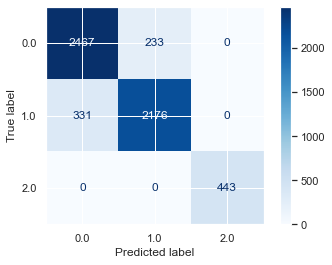

In [811]:
def evaluate_model(model, X, y_true, y_pred):
    """
    1. Precision, recall and f-score (weighted)
    2. Confusion matrix
    """
    precision, recall, f_score, support = precision_recall_fscore_support(y_true=y_true, y_pred=y_pred, average='weighted')
    print (f"Precision: {np.round(precision, 3)}, Recall: {np.round(recall, 3)}, F-score: {np.round(f_score, 3)}")
    disp = plot_confusion_matrix(estimator=model, X=X, y_true=y_true, cmap=plt.cm.Blues, normalize=None)
    print(disp.confusion_matrix)
    
evaluate_model(baseline_rf, X_test, y1_test, y1_pred)

> Ok, a really good thing here is that the model is learning the minority class quite well

So, hopefully we dont need much oversampling techniques